In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.svm import SVC, LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, hamming_loss, silhouette_score

# Question (1) (a)

In [2]:
data_set = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
data_set = data_set.drop(columns=['RecordID'])
data_set.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [4]:
labels = ['Family', 'Genus', 'Species']
X = data_set.drop(columns=labels)
y = data_set[labels]

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Family   7195 non-null   object
 1   Genus    7195 non-null   object
 2   Species  7195 non-null   object
dtypes: object(3)
memory usage: 168.8+ KB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Question (1) (b) (i) (ii)

In [8]:
for label in labels:
    parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
    
    svc = SVC()
    clf = GridSearchCV(svc, parameters, cv=10)
    clf.fit(X_train, y_train[[label]].values.ravel())
    
    y_pred = clf.predict(X_test)
    print('Label:', label)
    print('Best Paramaters:', clf.best_params_)
    print('Exact Match:', accuracy_score(y_test[[label]].values.ravel(), y_pred))
    print('Hamming Loss:', hamming_loss(y_test[[label]].values.ravel(), y_pred))
    print()

Label: Family
Best Paramaters: {'C': 100, 'gamma': 1}
Exact Match: 0.9935155164427976
Hamming Loss: 0.006484483557202408

Label: Genus
Best Paramaters: {'C': 100, 'gamma': 1}
Exact Match: 0.9921259842519685
Hamming Loss: 0.007874015748031496

Label: Species
Best Paramaters: {'C': 10, 'gamma': 1}
Exact Match: 0.9893469198703103
Hamming Loss: 0.010653080129689671



# Question (1) (b) (i) (iii)

In [9]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
for label in labels:
    parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
    
    svc = LinearSVC(penalty='l1', dual=False, max_iter=100000)
    clf = GridSearchCV(svc, parameters, cv=10)
    clf.fit(X_train, y_train[[label]].values.ravel())
    
    y_pred = clf.predict(X_test)
    print('Label:', label)
    print('Best Paramaters:', clf.best_params_)
    print('Exact Match:', accuracy_score(y_test[[label]].values.ravel(), y_pred))
    print('Hamming Loss:', hamming_loss(y_test[[label]].values.ravel(), y_pred))
    print()

Label: Family
Best Paramaters: {'C': 1}
Exact Match: 0.9286706808707735
Hamming Loss: 0.07132931912922649

Label: Genus
Best Paramaters: {'C': 10}
Exact Match: 0.9416396479851783
Hamming Loss: 0.058360352014821676

Label: Species
Best Paramaters: {'C': 10}
Exact Match: 0.9592403890690134
Hamming Loss: 0.04075961093098657



# Question (1) (b) (i) (iv)

In [11]:
sm = SMOTE(random_state=42)

for label in labels:
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train[[label]])
    parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
    
    svc = LinearSVC(penalty='l1', dual=False, max_iter=100000)
    clf = GridSearchCV(svc, parameters, cv=10)
    clf.fit(X_train_res, y_train_res.values.ravel())
    
    y_pred = clf.predict(X_test)
    print('Label:', label)
    print('Best Paramaters:', clf.best_params_)
    print('Exact Match:', accuracy_score(y_test[[label]].values.ravel(), y_pred))
    print('Hamming Loss:', hamming_loss(y_test[[label]].values.ravel(), y_pred))
    print()

Label: Family
Best Paramaters: {'C': 100}
Exact Match: 0.9092172301991662
Hamming Loss: 0.09078276980083372

Label: Genus
Best Paramaters: {'C': 100}
Exact Match: 0.9018063918480778
Hamming Loss: 0.09819360815192218

Label: Species
Best Paramaters: {'C': 1000}
Exact Match: 0.9578508568781844
Hamming Loss: 0.042149143121815655



SVM using Gaussian kernel and one versus all classifier in part (1)(b)(ii) had the highest exact match score and the lowest hamming loss. Using previous SVM with L1 penalty had the second highest exact match score and the second lowest hamming loss. Finally, the using the previous SVM with SMOTE to remedy class imbalance had the lowest exact match score and the highest hamming loss.

# Question (2) (a) (b) (c)

In [12]:
print('Starting Monte Carlo Simulation')
hamming_distances = []
hamming_scores = []
hamming_losses = []

for i in range(50):
    print()
    silhoutte_scores = []
    for k in range(2, 51):
        kmeans = KMeans(n_clusters=k, random_state=k).fit(X)
        labels = kmeans.labels_
        silhoutte_scores.append(silhouette_score(X, labels))
    
    optimal_k = np.argmax(silhoutte_scores) + 2
    kmeans = KMeans(n_clusters=optimal_k).fit(X)
    labels = kmeans.labels_
    print("Iteration " + str(i + 1) + ", " + "Optimal K=" + str(optimal_k) + ", " + "Majority Labels:")
    
    cluster_labels = y.copy()
    cluster_labels['pred_label'] = labels
    cluster_majority_labels = []
    for j in range(optimal_k):
        majority_triplet = []
        cluster = cluster_labels[cluster_labels['pred_label'] == j]
        for label in ['Family', 'Genus', 'Species']:
            majority_triplet.append(cluster[label].value_counts().idxmax())
        cluster_majority_labels.append(majority_triplet)
   
    for l in range(len(cluster_majority_labels)):
        print("Cluster " + str(l + 1) + ":", cluster_majority_labels[l])
    
    num_classified = 0
    num_misclassified = 0
    for j in range(optimal_k):
        cluster = cluster_labels[cluster_labels['pred_label'] == j]
        for idx, label in enumerate(['Family', 'Genus', 'Species']):
            num_classified += len(cluster[label][cluster[label] == cluster_majority_labels[j][idx]])
            num_misclassified += len(cluster[label][cluster[label] != cluster_majority_labels[j][idx]])
    
    avg_hamming_distance = num_misclassified / 3
    avg_hamming_score = num_classified / (len(y) * 3)
    avg_hamming_loss = num_misclassified / (len(y) * 3)
    hamming_distances.append(avg_hamming_distance)
    hamming_scores.append(avg_hamming_score)
    hamming_losses.append(avg_hamming_loss)
    
    print('Hamming Distance=' + str(avg_hamming_distance) + ', Hamming Score=' + str(avg_hamming_score) + ', Hamming Loss=' + str(avg_hamming_loss))

Starting Monte Carlo Simulation

Iteration 1, Optimal K=4, Majority Labels:
Cluster 1: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']
Cluster 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus']
Cluster 3: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']
Cluster 4: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens']
Hamming Distance=1600.3333333333333, Hamming Score=0.7775770210794534, Hamming Loss=0.2224229789205467

Iteration 2, Optimal K=4, Majority Labels:
Cluster 1: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus']
Cluster 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre']
Cluster 3: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']
Cluster 4: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']
Hamming Distance=1763.6666666666667, Hamming Score=0.754876071345842, Hamming Loss=0.24512392865415797

Iteration 3, Optimal K=4, Majority Labels:
Cluster 1: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']
Cluster 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus']
C

Iteration 22, Optimal K=4, Majority Labels:
Cluster 1: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus']
Cluster 2: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']
Cluster 3: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']
Cluster 4: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens']
Hamming Distance=1600.6666666666667, Hamming Score=0.7775306926106093, Hamming Loss=0.22246930738939077

Iteration 23, Optimal K=4, Majority Labels:
Cluster 1: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus']
Cluster 2: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']
Cluster 3: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens']
Cluster 4: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']
Hamming Distance=1595.6666666666667, Hamming Score=0.7782256196432707, Hamming Loss=0.22177438035672922

Iteration 24, Optimal K=4, Majority Labels:
Cluster 1: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus']
Cluster 2: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']
Cluster 3: ['Hylidae', 'H

Iteration 43, Optimal K=4, Majority Labels:
Cluster 1: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus']
Cluster 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre']
Cluster 3: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']
Cluster 4: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']
Hamming Distance=1764.6666666666667, Hamming Score=0.7547370859393097, Hamming Loss=0.24526291406069028

Iteration 44, Optimal K=4, Majority Labels:
Cluster 1: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']
Cluster 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus']
Cluster 3: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens']
Cluster 4: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']
Hamming Distance=1600.3333333333333, Hamming Score=0.7775770210794534, Hamming Loss=0.2224229789205467

Iteration 45, Optimal K=4, Majority Labels:
Cluster 1: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus']
Cluster 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre']
Cluster 3: ['Hylidae', 'Hypsibo

In [17]:
hamming_results = pd.DataFrame({'Hamming Distances': hamming_distances, 'Hamming Scores': hamming_scores, 'Hamming Losses': hamming_losses})
print(hamming_results)

    Hamming Distances  Hamming Scores  Hamming Losses
0         1600.333333        0.777577        0.222423
1         1763.666667        0.754876        0.245124
2         1595.666667        0.778226        0.221774
3         1600.333333        0.777577        0.222423
4         1600.333333        0.777577        0.222423
5         1600.333333        0.777577        0.222423
6         1600.333333        0.777577        0.222423
7         1600.333333        0.777577        0.222423
8         1600.333333        0.777577        0.222423
9         1600.333333        0.777577        0.222423
10        1598.333333        0.777855        0.222145
11        1599.666667        0.777670        0.222330
12        1600.333333        0.777577        0.222423
13        1600.333333        0.777577        0.222423
14        1600.333333        0.777577        0.222423
15        1600.333333        0.777577        0.222423
16        1600.333333        0.777577        0.222423
17        1600.333333       

In [18]:
hamming_results.describe()

,Hamming Distances,Hamming Scores,Hamming Losses
count,50.000000,50.000000,50.000000
mean,1614.806667,0.775565,0.224435
std,46.009468,0.006395,0.006395
min,1595.666667,0.754737,0.221774
25%,1600.333333,0.777577,0.222423
50%,1600.333333,0.777577,0.222423
75%,1600.333333,0.777577,0.222423
max,1764.666667,0.778226,0.245263


# Question (3)

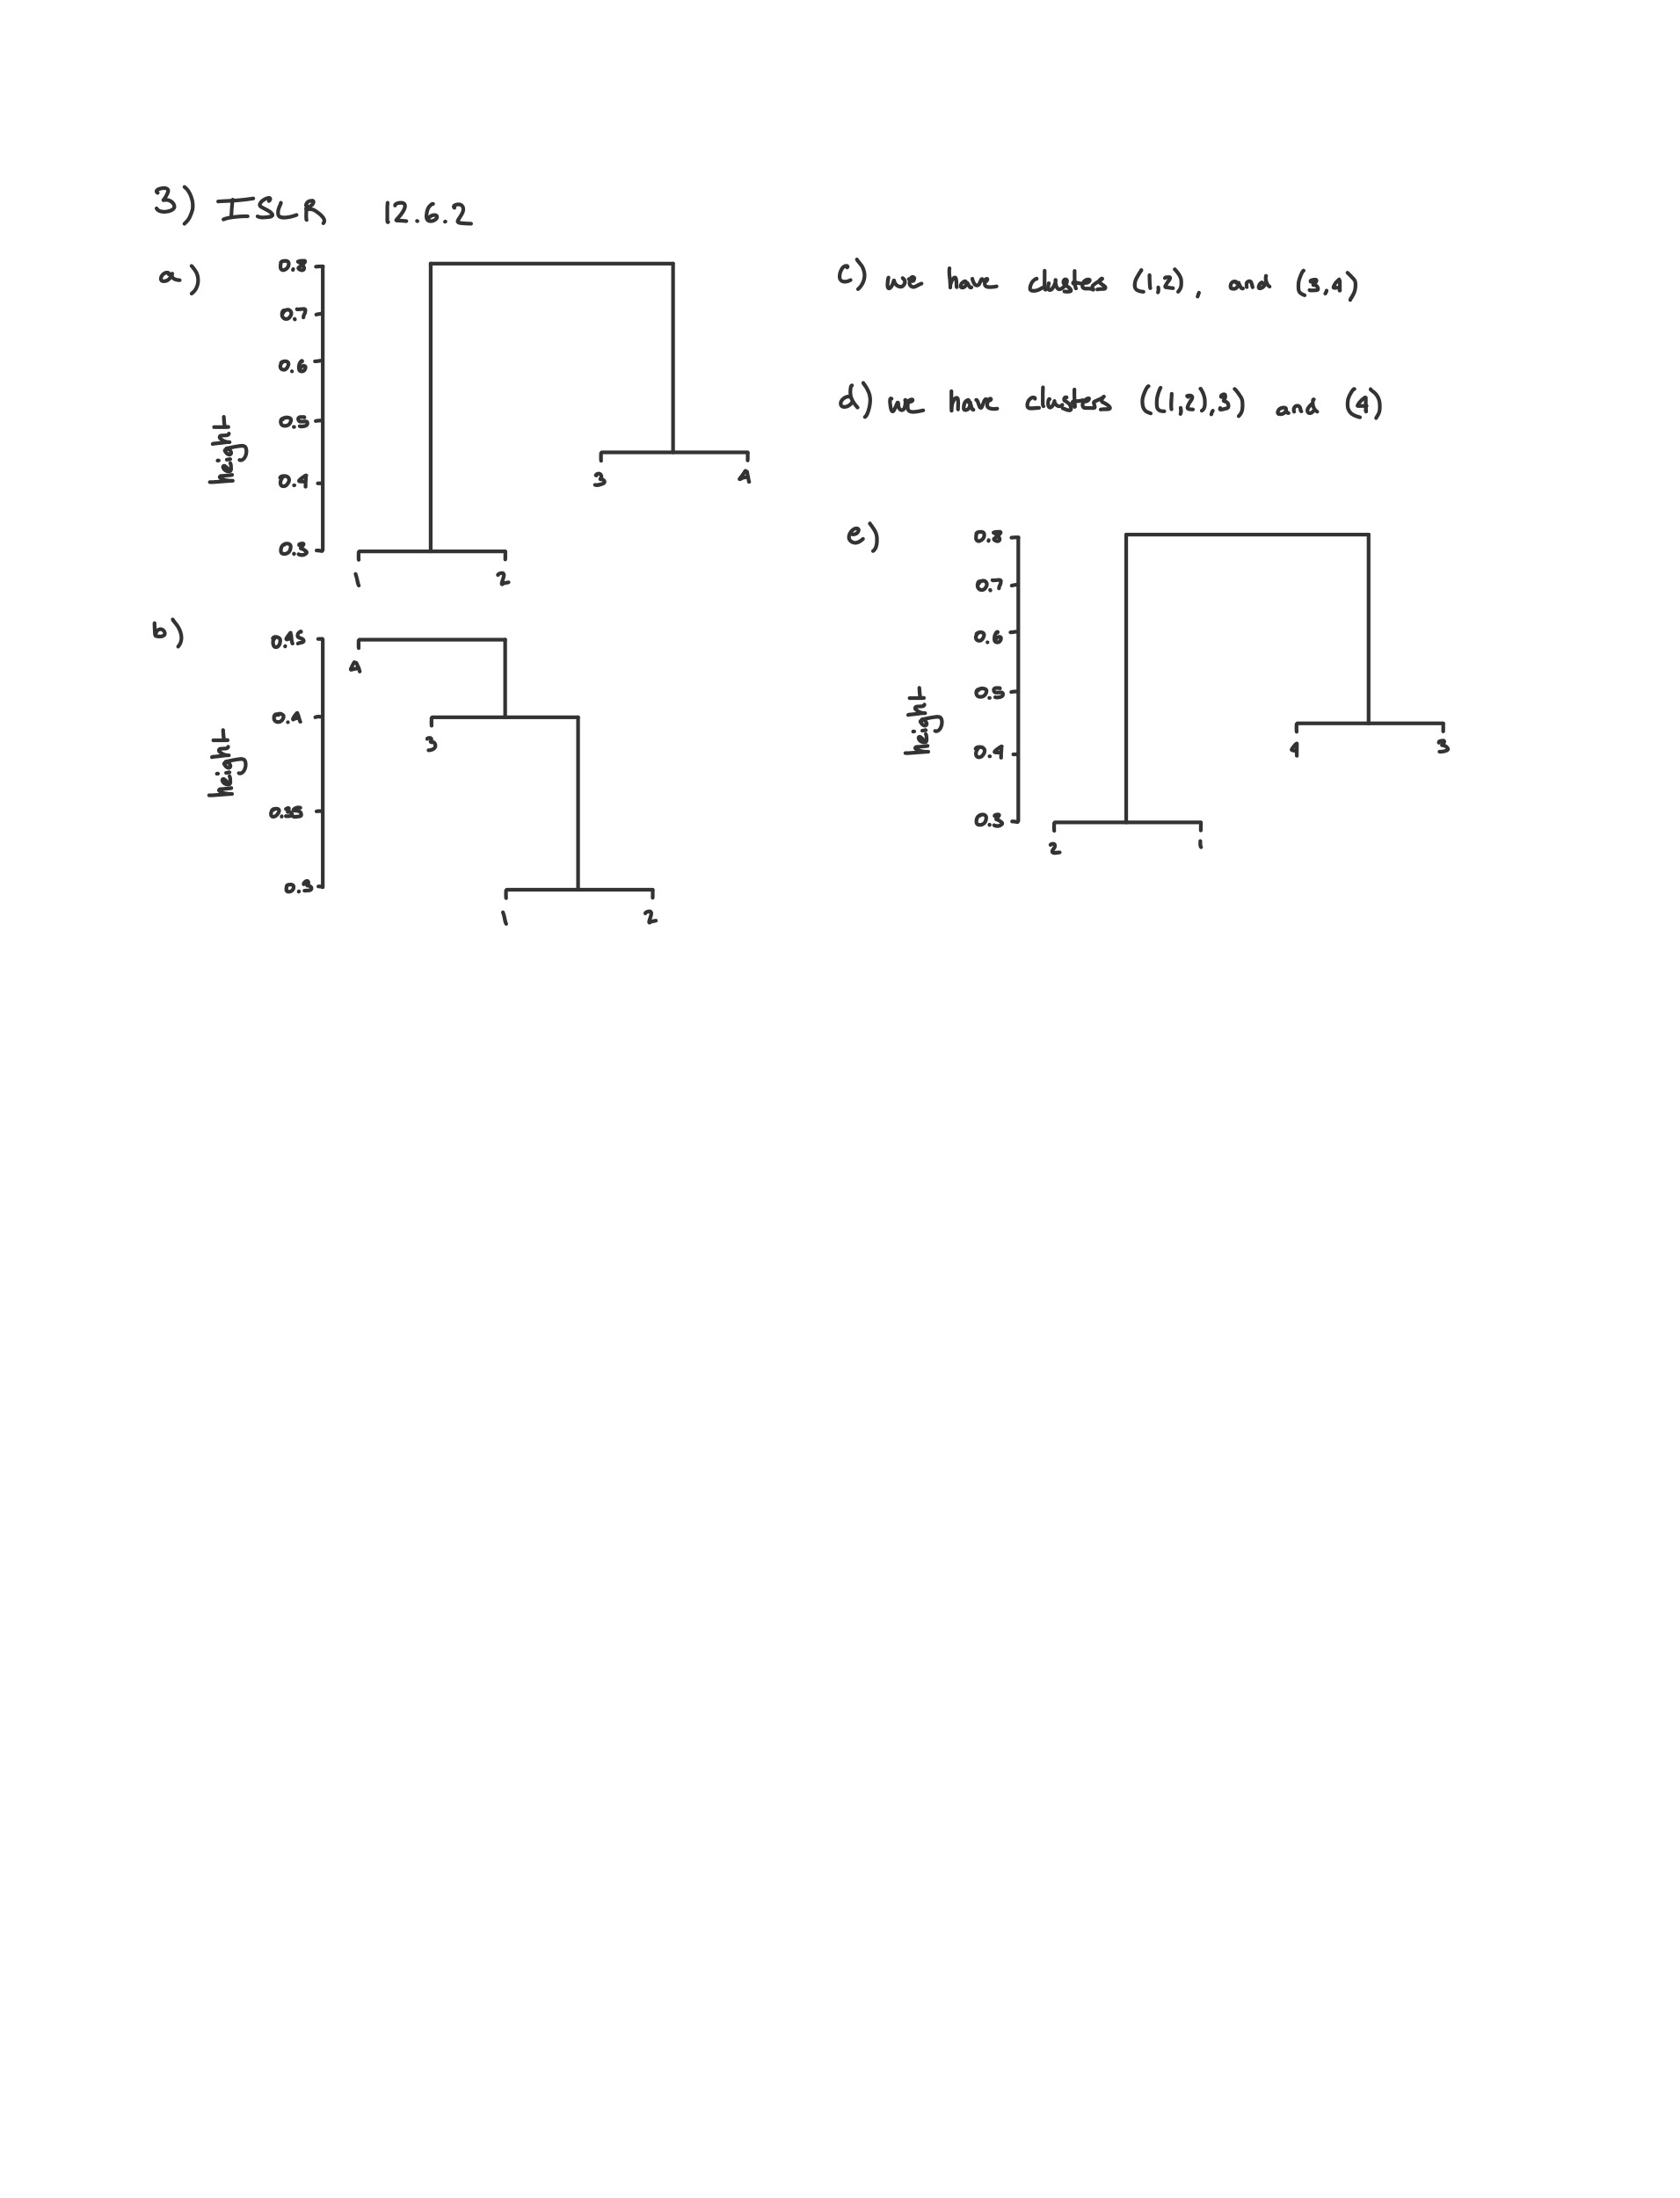